# Ocean Engineering - Project III
## Matthew Munson
## 2/26/2020
## Professor Shima Abadi




### Specified Region Limits:
Northern Boundary: 52.107  
Southern Boundary: 38.891  
Western Boundary: -131.836  
Eastern Boundary: -122.168  



In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import numpy as np
import math as math
import calendar
import pytz
from datetime import datetime
from dateutil import tz
import pandas as pd
import scipy.stats as ss
import matplotlib.dates as md
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure
import io
import requests
import urllib

## Global Variable Set

Not ideal coding practice, but used to make the size of the plotted map consistant with any number of data points

In [50]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/reducedData.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

GLOBAL_LATITUDE = latitude
GLOBAL_LONGITUDE = longitude
GLOBAL_MAGNITUDE = magnitude

print("Maximum Magnitude: ", max(magnitude))
print("Minimum Magnitude: ", min(magnitude))
print("Average Magnitude: ", np.average(magnitude))
print("Number of Earthquakes: ", len(magnitude))


Maximum Magnitude:  6.8
Minimum Magnitude:  2.5
Average Magnitude:  3.2412625189681337
Number of Earthquakes:  3295


## Open CSV Files

In [51]:
def openCSV(URL):
    
    return pd.read_csv(URL)

## Retrieve Data from File

In [52]:
def getData(file):
        
    time = file['time']
    latitude = file['latitude']
    longitude = file['longitude']
    magnitude = file['mag']
    
    return (time, latitude, longitude, magnitude)
    
    

## Convert Time Strings to DateTime

Converts UTC to Pacific Time

In [53]:
def convertTime(time):
    
    newTimeList = []
    
    #Fill the newTimeList with dateTime Objects
    for timeString in time:
        convertedTime = datetime.strptime(timeString, '%Y-%m-%dT%H:%M:%S.%fZ')
        newTimeList.append(convertedTime)
        
        
    from_zone = tz.tzutc()
    to_zone = tz.tzlocal()
    
    # Convert from UTC to local
    for timeVal in newTimeList:
        timeVal = timeVal.replace(tzinfo=from_zone)
        timeVal = timeVal.astimezone(to_zone)
        
        
    return newTimeList

## Old Time Formatting Test

In [54]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/reducedData.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

test_obj = datetime.strptime(time[0], '%Y-%m-%dT%H:%M:%S.%fZ')

print(test_obj)

from_zone = tz.tzutc()
to_zone = tz.tzlocal()

test_obj = test_obj.replace(tzinfo=from_zone)
test_obj = test_obj.astimezone(to_zone)

print(test_obj)

2020-02-22 19:14:27.580000
2020-02-22 11:14:27.580000-08:00


## Plot Magnitude vs. Time

It's pretty! Dot size increases with magnitude, color gradient too

In [55]:
def plotVsTime(time, magnitude):
    
    figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    count = 0
        
    for i in range(0, len(time)):
        plt.scatter(time[i], magnitude[i], color = [(magnitude[i] / 10, 1 - magnitude[i] / 10, 1 - magnitude[i] / 10)], s = pow(2.5,magnitude[i]))
    
    plt.title('Earthquake Magnitude vs. Time')
    plt.xlabel("Year")
    plt.ylabel("Magnitude")
    

## Plotting Magnitude vs. Time

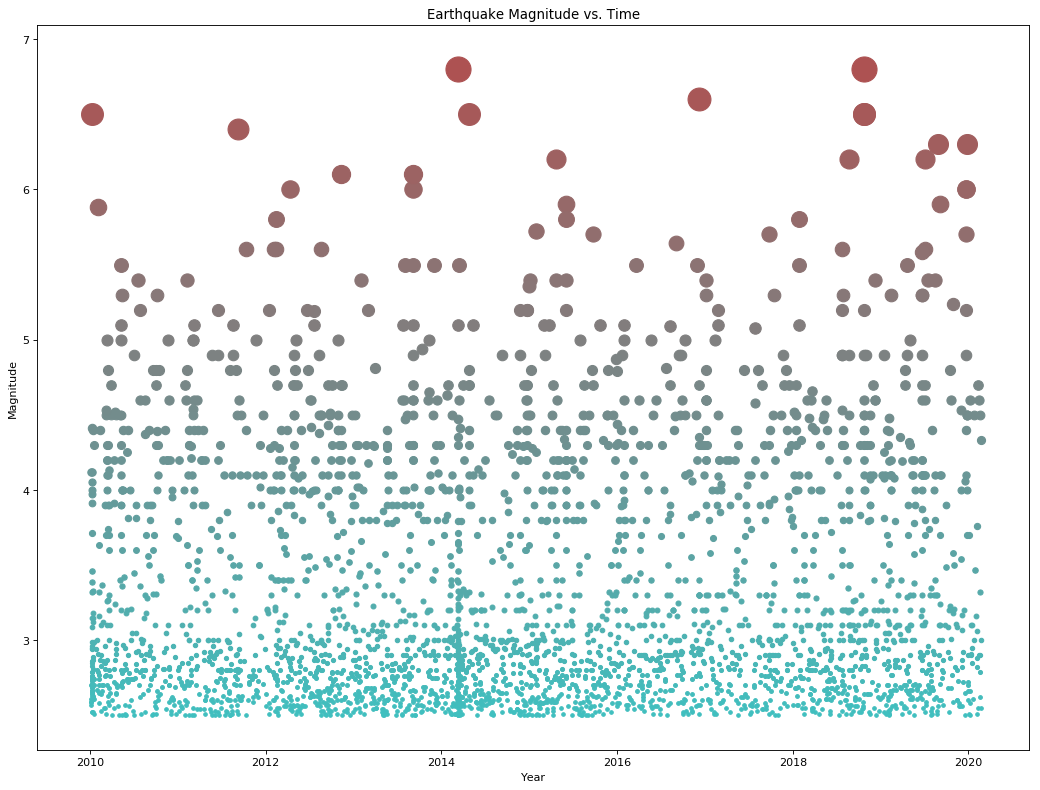

In [56]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/reducedData.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

time = convertTime(time)

plotVsTime(time, magnitude)


## Plot Earthquakes to a Map

Source: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [57]:
def plotLocation(latitude, longitude, magnitude):
    
    image = urllib.request.urlopen("https://github.com/mmunson2/BME450-Project3-Seismology/blob/master/Data/map.png?raw=true")
    mapImage = plt.imread(image)
    
    #Cheating here, always use 
    #BBox = ((GLOBAL_LONGITUDE.min(),   GLOBAL_LONGITUDE.max(),      
         #GLOBAL_LATITUDE.min(), GLOBAL_LATITUDE.max()))
    
    BBox = ((-131.836 - 1, -122.168 - 1, 38.891 + 1, 52.107 + 1))
    
    
    
    fig, ax = plt.subplots(figsize = (8,7))
    
    for i in range(0, len(longitude)):
            
        if(magnitude[i] > 6):
            plt.scatter(longitude[i], latitude[i], color = [(81/256, 6/256, 6/256)], s = 200)
        elif(magnitude[i] > 5):
            plt.scatter(longitude[i], latitude[i], color = [(107/256, 29/256, 28/256)], s = 100)
        elif(magnitude[i] > 4):
            plt.scatter(longitude[i], latitude[i], color = [(134/256, 50/256, 48/256)], s = 50)
        elif(magnitude[i] > 3):    
            plt.scatter(longitude[i], latitude[i], color = [(162/256, 71/256, 69/256)], s = 25) 
        elif(magnitude[i] > 2):
            plt.scatter(longitude[i], latitude[i], color = [(191/256, 92/256, 91/256)], s = 15) 
        elif (magnitude[i] > 1):
            plt.scatter(longitude[i], latitude[i], color = [(220/256, 114/256, 114/156)], s = 5)    
        
    plt.title('Earthquake Locations on the Juan De Fuca Plate')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    ax.imshow(mapImage, zorder=0, extent = BBox, aspect= 'equal')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])

## Earthquake Map - Full Data Set

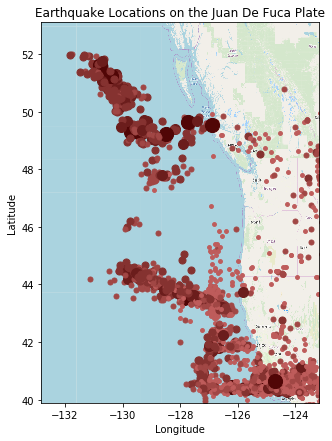

In [58]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/reducedData.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

time = convertTime(time)

plotLocation(latitude, longitude, magnitude)

## Earthquake Map - April 2015 Only

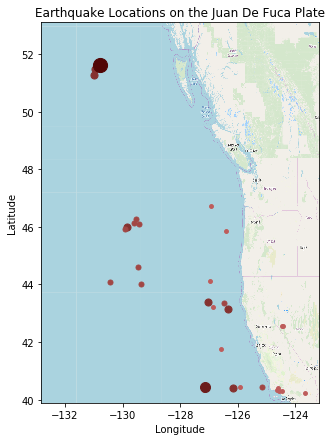

In [59]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/April2015Data.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

time = convertTime(time)

plotLocation(latitude, longitude, magnitude)


# Part II: Additional Magnitude vs. Time Graphs

### Transform Boundary - Blanco Fracture Zone

[42.699, 45.011] Latitude  
[-131.001, -126.013] Longitude

Maximum Magnitude:  6.3
Minimum Magnitude:  2.5
Average Magnitude:  3.616455696202532
Number of Earthquakes:  553


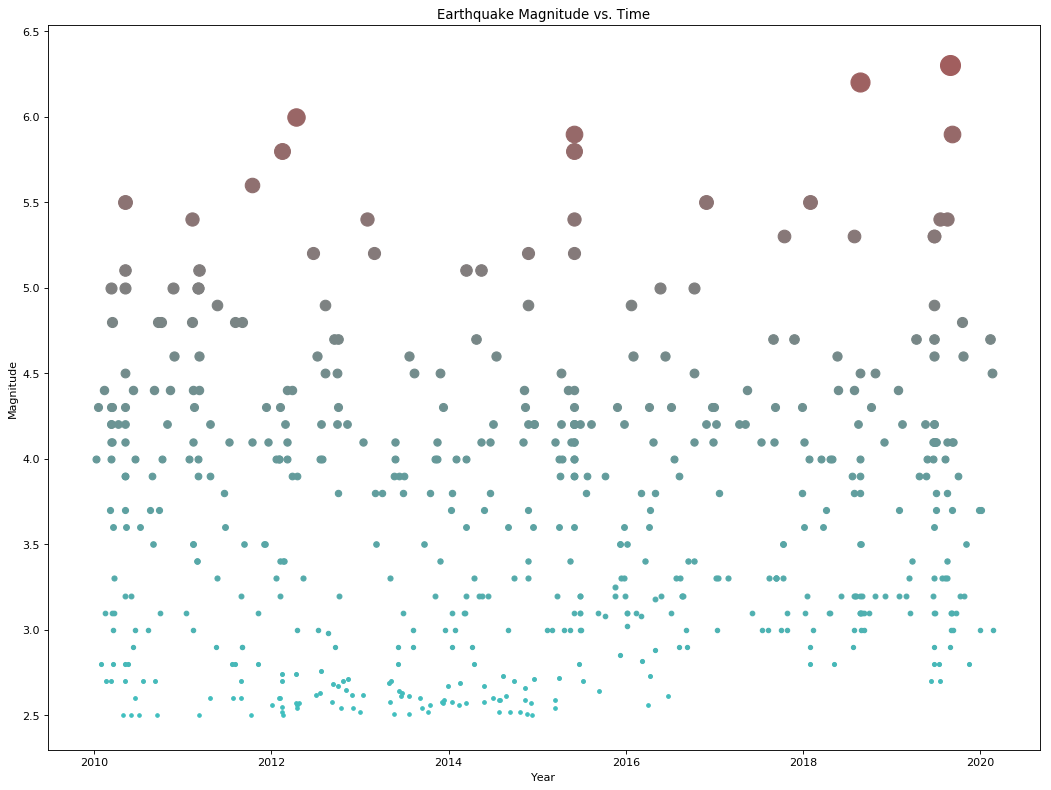

In [60]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/Blanco_Fracture_Zone.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

time = convertTime(time)

print("Maximum Magnitude: ", max(magnitude))
print("Minimum Magnitude: ", min(magnitude))
print("Average Magnitude: ", np.average(magnitude))
print("Number of Earthquakes: ", len(magnitude))

plotVsTime(time, magnitude)

### Divergance Boundary - Gorda Ridge

[40.044, 43.866] Latitude  
[-128.188, -125.112] Longitude

Maximum Magnitude:  6.8
Minimum Magnitude:  2.5
Average Magnitude:  3.262467411545624
Number of Earthquakes:  1074


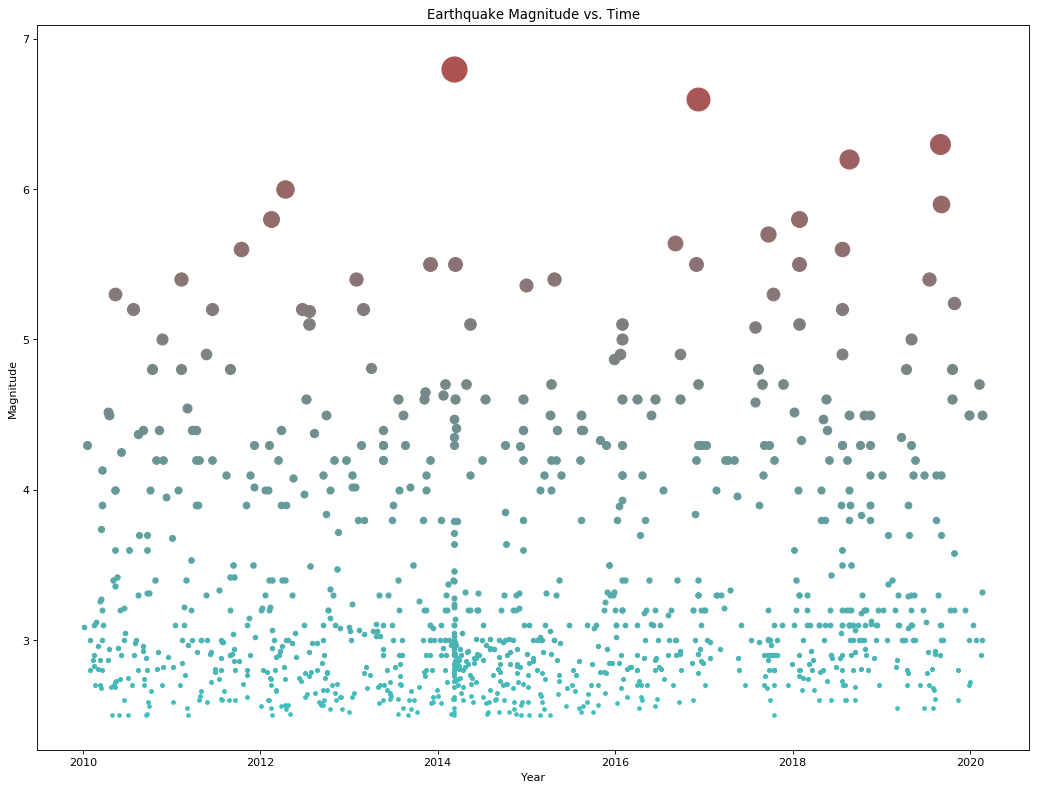

In [61]:
reducedDataURL = "https://raw.githubusercontent.com/mmunson2/BME450-Project3-Seismology/master/Data/Gorda_Ridge.csv"

file = openCSV(reducedDataURL)

(time, latitude, longitude, magnitude) = getData(file)

time = convertTime(time)

print("Maximum Magnitude: ", max(magnitude))
print("Minimum Magnitude: ", min(magnitude))
print("Average Magnitude: ", np.average(magnitude))
print("Number of Earthquakes: ", len(magnitude))

plotVsTime(time, magnitude)